###### Problem Set 1, due January 10th at 5:30pm 


###Before You Start
Make sure to at least take a basic tutorial in the IPython notebook, otherwise you'll be totally lost.  For this problem set, you should download IMT574-PS1.ipynb and the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [1]:
# #IPython is what you are using now to run the notebook
# import IPython
# print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

Numpy version:        1.15.4 (need at least 1.7.1)
SciPy version:         1.1.0 (need at least 0.12.0)
Pandas version:       0.23.4 (need at least 0.11.0)
Mapltolib version:     3.0.2 (need at least 1.2.1)
Scikit-Learn version: 0.20.1 (need at least 0.13.1)


##About the Problem Set: 
This is the same problem set used by Emma Spiro in INFX573. The only difference is that instead of doing the problem set in R, you will use Python and the IPython notebook.

##Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.
Selected questions ask you to answer in multiple ways. Make sure to provide different functions or ways for answering the same question. This will help you see that most data questions can be answered in different ways even with the same software language.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
flights_df= pd.read_csv('flights.csv')

In [4]:
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
a = flights_df.dest.unique()
print(a)
flights_df.head(10)


['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


##Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

##Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [6]:
# Your code here
flights_df1=flights_df[ flights_df.dest=='SEA']
flights_df1.shape[0]

3923

 Number of flights from NYC airports to Seattle are 3923

(b) How many airlines fly from NYC to Seattle?

In [7]:
# Your code here
carriersN_to_seattle = flights_df1.carrier.unique()
print(carriersN_to_seattle)

['AS' 'DL' 'UA' 'B6' 'AA']


Airlines flying from NYC to Seattle are 'AS' 'DL' 'UA' 'B6' 'AA'.

(c) How many unique air planes fly from NYC to Seattle?

In [8]:
# Your code here
flights_df1['tailnum'].nunique()


935

 -- Write your answer in English here -- 

(d) What is the average arrival delay for flights from NC to Seattle?

In [9]:
# Your code here
flights_df1['arr_delay'].mean()

-1.0990990990990992

 -- Write your answer in English here -- 

(e) What proportion of flights to Seattle come from each NYC airport? Provide multiple ways of answering the question.

In [10]:

print('''Method 1''')
# find unique origins
nyc_origins = flights_df1['origin'].unique()
print(nyc_origins)

flights_df2 = flights_df1[['origin']]
for i in nyc_origins:
    print(flights_df2[flights_df2['origin'] == i].count(0)[0])

print()
print('''Method 2''')
flights_df2 = flights_df1[['origin','dest']]
flights_df2 = flights_df2.groupby(['origin']).count().reset_index()
flights_df2['%'] = flights_df2['dest']/flights_df2['dest'].sum()*100
flights_df2.rename(columns={'dest':'flight_count'},inplace=True)
print(flights_df2)


Method 1
['EWR' 'JFK']
1831
2092

Method 2
  origin  flight_count          %
0    EWR          1831  46.673464
1    JFK          2092  53.326536


We calculated the proportion of flights flying from NYC Airports through two different methods.
Overall, 46.67% (1831) flights depart from EWR and 53.32% (2092) fly depart from JFK

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [11]:

flights_df2 = flights_df[['year','month','day','dep_delay']]
flights_df2 = flights_df2.groupby(['year','month','day']).mean()
max_mean = flights_df2['dep_delay'].max()
flights_df3 = flights_df2.loc[flights_df2['dep_delay']==max_mean]

flights_df3

# print(flights_df3['year'],flights_df3['month'],flights_df3['day'])

,,,dep_delay
year,month,day,
2013,3,8,83.536921


 2013-09-12 has largest depature delay.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [12]:
flights_df2 = flights_df[['year','month','day','arr_delay']]
flights_df2 = flights_df2.groupby(['year','month','day'])
flights_df2 = flights_df2.mean()
max_mean = flights_df2['arr_delay'].max()
flights_df3 = flights_df2.loc[flights_df2['arr_delay']==max_mean]

flights_df3

,,,arr_delay
year,month,day,
2013,3,8,85.862155


Delayed flights can be discerned from arr_delay field. The highest average arrival delay in 2013 is on June 27 which can be the worst day to fly out of NYC.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

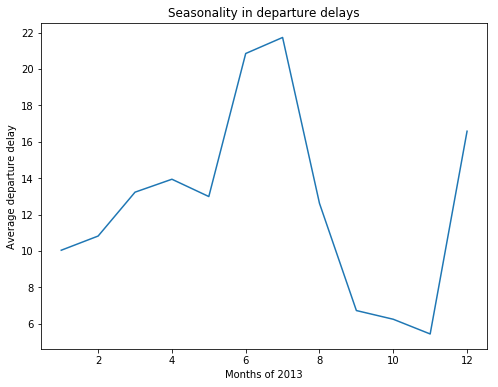

In [13]:
flights_df2 = flights_df[['month','dep_delay']]
#flights_df2['date'] = pd.to_datetime(flights_df2[['year', 'month', 'day']])

#flights_df2.info()
flights_df2 = flights_df2.groupby(flights_df['month']).mean()
#flights_df2['date'].to_datetime()
plt.figure(figsize=(8,6))
plt.plot(flights_df2['month'],flights_df2['dep_delay'])
plt.xlabel('Months of 2013')
plt.ylabel('Average departure delay')
plt.title("Seasonality in departure delays")
plt.show()


Based on flight delays, in September, October and November delays are minimum. The delays peak in May, June and July and in December. New York is a touristy place where people from all over the world come and visit and one trend we might discern is that delays are maximum during summer vacation and winder holidays

(d) On average, how do departure delays vary over the course of a day?

Text(0.5, 1.0, 'Departure delay over the course of a day')

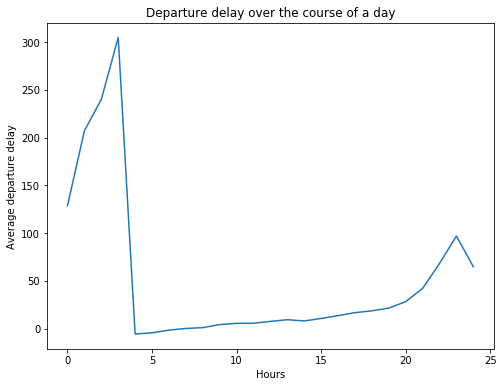

In [14]:
flights_df2 = flights_df[['hour','dep_delay']]
flights_df2 = flights_df2.groupby(flights_df['hour']).mean()
plt.figure(figsize=(8,6))
plt.plot(flights_df2['hour'],flights_df2['dep_delay'])
plt.xlabel('Hours')
#plt.axis.set_xlim(xmin=0,xmax=23)
plt.ylabel('Average departure delay')
plt.title("Departure delay over the course of a day")

On an Average it is apparent that departure delays peak post midnight and are negligible early morning. From early morning to night, there is a steady increase of delays and post-midnight delays shoot up to high amounts.

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [15]:
flights_df2 = flights_df[['air_time','dest','carrier','tailnum','flight','origin','distance']]
max_speed = (flights_df2['distance']/flights_df2['air_time']).max()
flights_df3 = flights_df2.loc[flights_df2['distance']/flights_df2['air_time'] == max_speed ]
flights_df3

,air_time,dest,carrier,tailnum,flight,origin,distance
216447,65.0,ATL,DL,N666DN,1499,LGA,762


In 2013, amongst all the flights departing from NYC, flight DL-1499 flying from LaGuardia Airport (LGA) to Hartsfield-Jackson, Atlanta flew the fastest

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [16]:
flights_df2 = flights_df[['day','dest','carrier','flight']]
flights_df2 = flights_df2.groupby(['dest','carrier','flight']).count()
flights_df2 = flights_df2[ flights_df2.day==365]
print(flights_df2)
print("The above list indicates " + str(len(flights_df2.day)) + " flights running every single day of year 2013 from NYC")
# Get all the flights flying on each day of the year
print("\n")
flights_df3 = flights_df2[flights_df2.day>365]
print(flights_df3)
print("Empty dataframe indicates no flight has sum exceeding 365")

                     day
dest carrier flight     
BUR  B6      359     365
CLT  B6      219     365
FLL  B6      371     365
HNL  UA      15      365
IAD  EV      5712    365
LAS  VX      251     365
LAX  AA      119     365
             181     365
     VX      407     365
             413     365
MCO  B6      1783    365
     DL      2159    365
MIA  AA      1611    365
SFO  AA      59      365
SJU  AA      1357    365
     B6      703     365
SRQ  B6      431     365
TPA  DL      2391    365
The above list indicates 18 flights running every single day of year 2013 from NYC


Empty DataFrame
Columns: [day]
Index: []
Empty dataframe indicates no flight has sum exceeding 365


They are flying to LAX, SJU, MIA, SFO, MCO, CLT, BUR, FLL, DRQ, TPA, IAD, HNL and LAS (13 destinations)

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5, 1.0, 'Mean delays of Airline Carrier in Summer')

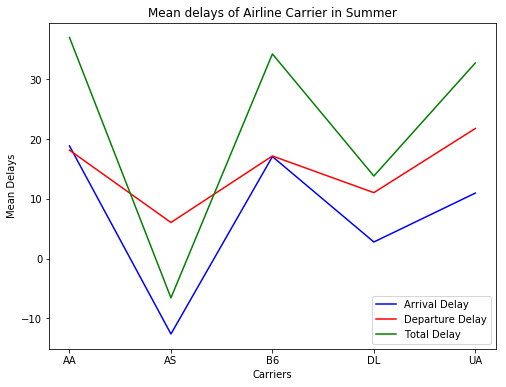

In [17]:
flights_df2 = flights_df[flights_df.dest=='SEA']
flights_df2 = flights_df2[['arr_delay','dep_delay','carrier']].dropna()[flights_df.month.isin([6,7,8])].groupby('carrier').mean()


flights_df2['total_delay'] = flights_df2['arr_delay']+flights_df2['dep_delay']
#flights_df2.plot(figsize=(8,6),title='Mean delays of Airline Carrier in Summer')

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(flights_df2['arr_delay'], 'b', label='Arrival Delay')
ax.plot(flights_df2['dep_delay'], 'r', label='Departure Delay')
ax.plot(flights_df2['total_delay'], 'g', label='Total Delay')
leg = ax.legend();
ax.set(xlabel='Carriers', ylabel='Mean Delays')
ax.set_title('Mean delays of Airline Carrier in Summer')

Text(0.5, 1.0, 'Mean delay throughout the year')

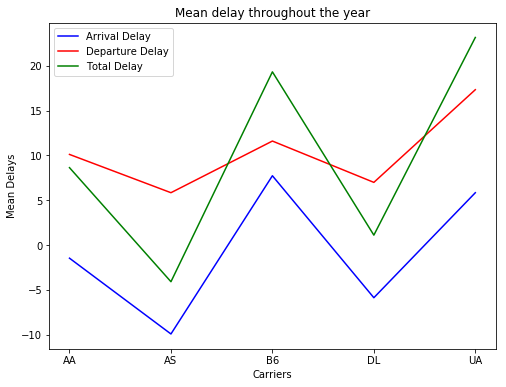

In [18]:
flights_df2 = flights_df[flights_df.dest=='SEA']
flights_df2 = flights_df2[['arr_delay','dep_delay','carrier']].dropna().groupby('carrier').mean()
flights_df2['total_delay'] = flights_df2['arr_delay']+flights_df2['dep_delay']

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(flights_df2['arr_delay'], 'b', label='Arrival Delay')
ax.plot(flights_df2['dep_delay'], 'r', label='Departure Delay')
ax.plot(flights_df2['total_delay'], 'g', label='Total Delay')
leg = ax.legend();
ax.set(xlabel='Carriers', ylabel='Mean Delays')
ax.set_title('Mean delay throughout the year')

Research Question: If you dislike delays, which is the best airline carrier to take throughout the year and during summer vacations (June, July, August) if you are travelling to Seattle? 

 - Based on line graphs AS is the best airline carrier to opt for if travelling to Seattle from NYC.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [19]:
#flights_df2 = flights_df[['month','dep_delay']]
# #flights_df2['date'] = pd.to_datetime(flights_df2[['year', 'month', 'day']])

# #flights_df2.info()
# flights_df2 = flights_df2.groupby(flights_df['month']).mean()
# #flights_df2['date'].to_datetime()
# plt.figure(figsize=(8,6))
# plt.plot(flights_df2['month'],flights_df2['dep_delay'])
# plt.xlabel('Months of 2013')
# plt.ylabel('Average departure delay')
# plt.title("Seasonality in departure delays")
# plt.show()

In [22]:
weather = pd.read_csv('C:\\Users\\ajink\\Documents\\imt574\\weather.csv')
# weather_df1 = weather.groupby(['year','month']).mean().reset_index()
# waether_df1 = weather_df1[['temp','dewp','humid','wind_dir','wind_speed','wind_gust','precip','pressure','visib','month']]
# weather_analysis = pd.merge(flights_df2,weather_df1,how='inner',on=['month'])
# # weather_df1 = weather_df1[['month','temp','dewp','humid','windspeed','pressure','visib']]
# weather_analysis
# # fig, ax = plt.subplots(figsize=(8, 6))
# # ax.plot(weather_df1['temp'],'b',label='Temperature')
# # ax.plot(flights_df2['dep_delay'],)
# # ax.plot(weather_df1['wind_speed'],'r',label='Dew Point')
# # ax.plot(weather_df1['pressure']/8.5,'G',label='Dew Point')
# # ax.plot(weather_df1['visib'],'r',label='Dew Point')
# #plt.show()

In order to find weather conditions associated with flight delays leaving NYC graphically, we are plotting
linear regression model of various variables depicting weather conditions against departure delays.

We begin by ensuring the weather table and the flights table are both normalized on the day of the year level. 
The variables are grouped together by 'month' and 'day' field.

In [23]:
flights_df2 = flights_df[['day','month','dep_delay','origin']].dropna()


flights_df2 = flights_df2.groupby(['month','day']).mean()
# flights_df2.count()
weather = weather.groupby(['month','day']).mean().reset_index()
weather_analysis = pd.merge(flights_df2,weather,how='inner',on=['day','month'])
# #weather_analysis.count()

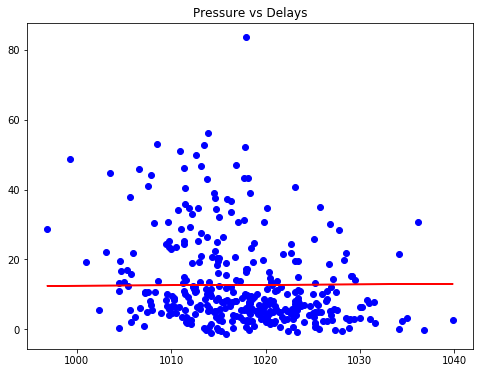

In [25]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np

x1 = weather_analysis['pressure']
x2 = weather_analysis['temp']
y = weather_analysis['dep_delay']

results1 = sm.OLS(y, x1).fit()
slope1=results1.params[0]

plt.figure(figsize=(8,6))
# Plot a line
plt.plot(x1, y, 'bo')
y =  slope1 * x1
plt.title('Pressure vs Delays')
plt.plot(x1, y, 'r-')


plt.show()

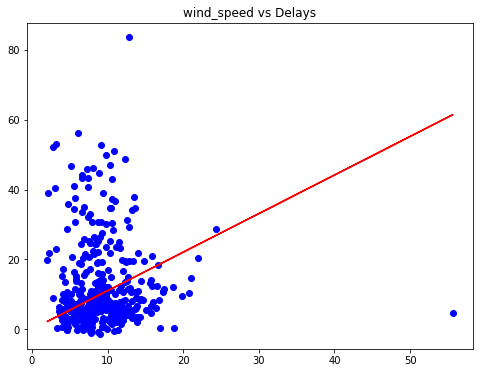

In [26]:
x = weather_analysis['wind_speed']
y = weather_analysis['dep_delay']

results = sm.OLS(y, x).fit()
slope=results.params[0]

plt.figure(figsize=(8,6))
# Plot a line
plt.plot(x, y, 'bo')
y =  slope * x
plt.title('wind_speed vs Delays')
plt.plot(x, y, 'r-')
plt.show()

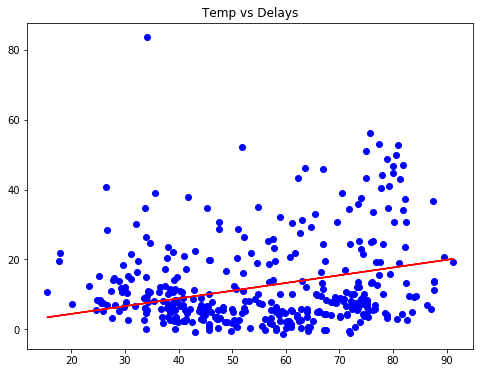

In [27]:
x = weather_analysis['temp']
y = weather_analysis['dep_delay']

results = sm.OLS(y, x).fit()
slope=results.params[0]

plt.figure(figsize=(8,6))
# Plot a line
plt.plot(x, y, 'bo')
y =  slope * x
plt.title('Temp vs Delays')
plt.plot(x, y, 'r-')
plt.show()

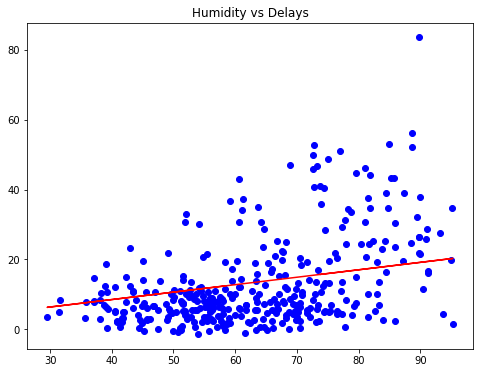

In [28]:
x = weather_analysis['humid']
y = weather_analysis['dep_delay']

results = sm.OLS(y, x).fit()
slope=results.params[0]

plt.figure(figsize=(8,6))
# Plot a line
plt.plot(x, y, 'bo')
y =  slope * x
plt.title('Humidity vs Delays')
plt.plot(x, y, 'r-')
plt.show()

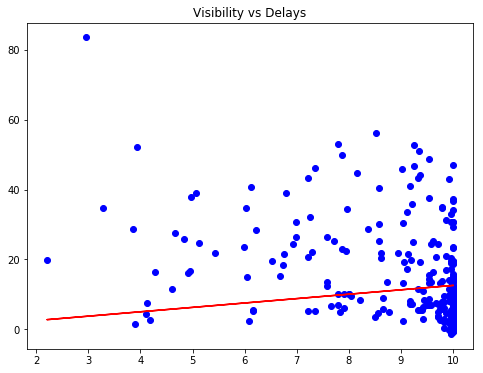

In [29]:
x = weather_analysis['visib']
y = weather_analysis['dep_delay']

results = sm.OLS(y, x).fit()
slope=results.params[0]

plt.figure(figsize=(8,6))
# Plot a line
plt.plot(x, y, 'bo')
y =  slope * x
plt.title('Visibility vs Delays')
plt.plot(x, y, 'r-')
plt.show()

We analysed 5 variables visibility, pressure, humidity, temperature, and wind speed. Visually, it can be discerned that humidity and temperature are a high correlation with delays.